# Classification Trees and Random Forest Classification (supermarket data)

In this notebook, we will use Classification Tree and Random Forest classifiers to predict supermarket brands based on various features like location, population density, brand, and more. We will evaluate the models using feature importance, confusion matrices, and ROC curves.

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest


## Import supermarkets data

In [2]:
# Read and select variables
columns = ['id',
           'bfs_name',
           'bfs_number',
           'lat',
           'lon',
           'brand',
           'pop',
           'pop_dens',
           'frg_pct',
           'emp',
          ]
df_supermarkets_orig = pd.read_csv("./Data/supermarkets_data_enriched.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_supermarkets_orig.shape)

# Brand to upper case letters
df_supermarkets_orig['brand'] = df_supermarkets_orig['brand'].str.upper()

# First records
df_supermarkets_orig.head(5)

(3242, 10)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,SPAR,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,DENNER,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0


In [3]:
# Import car data
# Read and select variables
columns = ['Offer_Id',
            'Type',
            'Fuel_Type',
            'Transmission',
            'Dealer_PLZ',
            'Dealer_City',
            'Dealer_Street_House_Nr',
            'Init_Regist_MY',
            'Init_Regist_Month',
            'Init_Regist_Year',
            'Init_Regist_Dt',
            'Make',
            'Mileage',
            'HP',
            'Price',
          ]
df_car_orig = pd.read_csv("/workspaces/python_machine_learning_basics/CART_RandomForest/Data/autoscout24_data_enriched_cleaned.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_car_orig.shape)

# Brand to upper case letters
df_car_orig['Make'] = df_car_orig['Make'].str.upper()

# First records
df_car_orig.head(5)

(3971, 15)


,Offer_Id,Type,Fuel_Type,Transmission,Dealer_PLZ,Dealer_City,Dealer_Street_House_Nr,Init_Regist_MY,Init_Regist_Month,Init_Regist_Year,Init_Regist_Dt,Make,Mileage,HP,Price
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10,AUDI,75000,245,22500
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06,MERCEDES-BENZ,46655,184,23749
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06,MERCEDES-BENZ,138955,306,18500
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08,MERCEDES-BENZ,43000,360,36000
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09,AUDI,43300,252,48500


## Count and remove missing values

In [7]:
# Count missing values
print(df_supermarkets_orig.isna().sum())

# Remove missing values
df_supermarkets = df_supermarkets_orig.dropna()
df_supermarkets

id               0
bfs_name         0
bfs_number       0
lat              0
lon              0
brand         1233
pop              0
pop_dens         0
frg_pct          0
emp             45
dtype: int64


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,SPAR,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,DENNER,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0
...,...,...,...,...,...,...,...,...,...,...
3230,9584570723,Seedorf (UR),1214,46.881529,8.615975,VOLG,2051,106.379668,6.972209,703.0
3231,9593770082,Bäretswil,111,47.339296,8.839173,VOLG,5053,227.715187,10.152385,1647.0
3233,9624205242,Buch am Irchel,24,47.549645,8.618709,VOLG,979,95.886386,7.252298,200.0
3238,9950926547,Marbach (SG),3253,47.392404,9.569855,VOLG,2110,481.735160,18.578199,678.0


In [4]:
# Count missing values
print(df_car_orig.isna().sum())

# Remove missing values
df_cars = df_car_orig.dropna()
df_cars

Offer_Id                  0
Type                      0
Fuel_Type                 0
Transmission              0
Dealer_PLZ                0
Dealer_City               0
Dealer_Street_House_Nr    0
Init_Regist_MY            0
Init_Regist_Month         0
Init_Regist_Year          0
Init_Regist_Dt            0
Make                      0
Mileage                   0
HP                        0
Price                     0
dtype: int64


,Offer_Id,Type,Fuel_Type,Transmission,Dealer_PLZ,Dealer_City,Dealer_Street_House_Nr,Init_Regist_MY,Init_Regist_Month,Init_Regist_Year,Init_Regist_Dt,Make,Mileage,HP,Price
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10,AUDI,75000,245,22500
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06,MERCEDES-BENZ,46655,184,23749
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06,MERCEDES-BENZ,138955,306,18500
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08,MERCEDES-BENZ,43000,360,36000
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09,AUDI,43300,252,48500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,7137137,FERRARI F360 Spider (Cabriolet),Benzin,Automatisiertes Schaltgetriebe,8852,Altendorf,8852 Altendorf,2.2002,2.0,2002.0,2002-02,FERRARI,78000,400,58400
3967,6758841,MERCEDES-BENZ SL 500 560 SL (Cabriolet),Benzin,Automatik-Getriebe,9444,DIEPOLDSAU,WERKSTRASSE 10 1,1.1987,1.0,1987.0,1987-01,MERCEDES-BENZ,315000,232,15900
3968,7461330,MERCEDES-BENZ CL 63 AMG 7G-Tronic (Coupé),Benzin,Automat sequentiell,8953,Dietikon,8953 Dietikon,8.2007,8.0,2007.0,2007-08,MERCEDES-BENZ,85000,525,42000
3969,7005403,BMW 328i Cabrio (Cabriolet),Benzin,Schaltgetriebe manuell,2543,Lengnau,Mühleweg 8,8.1995,8.0,1995.0,1995-08,BMW,188920,193,9980


## Subset with selected brands

In [9]:
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['MIGROS', 'VOLG'])]
print(df_sub.shape)
df_sub.head()

(696, 10)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0
8,48932835,Zürich,261,47.375020,8.522895,MIGROS,420217,4778.994655,32.458468,491193.0
11,83330862,Zürich,261,47.344749,8.529981,MIGROS,420217,4778.994655,32.458468,491193.0
12,119249170,Zürich,261,47.375255,8.536107,MIGROS,420217,4778.994655,32.458468,491193.0
15,262400822,Zürich,261,47.364072,8.530945,MIGROS,420217,4778.994655,32.458468,491193.0


In [5]:
df_sub_car = df_cars.loc[df_cars['Make'].isin(['AUDI', 'BMW'])]
print(df_sub_car.shape)
df_sub_car.head()

(1051, 15)


,Offer_Id,Type,Fuel_Type,Transmission,Dealer_PLZ,Dealer_City,Dealer_Street_House_Nr,Init_Regist_MY,Init_Regist_Month,Init_Regist_Year,Init_Regist_Dt,Make,Mileage,HP,Price
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10,AUDI,75000,245,22500
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09,AUDI,43300,252,48500
10,7511828,AUDI RS3 2.5 TSI quattro S-tronic (Limousine),Benzin,Automatisiertes Schaltgetriebe,2087,Cornaux,Route des Provins 36,5.2018,5.0,2018.0,2018-05,AUDI,32000,400,59800
13,7510626,BMW 1er M Coupé (Coupé),Benzin,Schaltgetriebe manuell,8272,Ermatingen,Hauptstrasse,6.2012,6.0,2012.0,2012-06,BMW,50500,340,44999
14,7407798,AUDI RS3 2.5 TSI quattro S-tronic (Limousine),Benzin,Automatisiertes Schaltgetriebe,6900,Lugano,6900 Lugano,9.2018,9.0,2018.0,2018-09,AUDI,51000,400,48500


## Pivot table

In [10]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df_sub[['lat',
                       'lon',
                       'brand',
                       'pop',
                       'pop_dens',
                       'frg_pct',
                       'emp']],
                index=['brand'],
                values=['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp'],
                aggfunc=(np.mean, 'count')).round(0)

emp          frg_pct         lat         lon        pop           \
       count     mean   count  mean count  mean count mean count     mean   
brand                                                                       
MIGROS   486  60264.0     486  28.0   486  47.0   486  8.0   486  58452.0   
VOLG     210   2382.0     210  16.0   210  47.0   210  9.0   210   4811.0   

       pop_dens          
          count    mean  
brand                    
MIGROS      486  2016.0  
VOLG        210   363.0

In [11]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df_sub_car[['Mileage',
                       'HP',
                       'Price',
                       'Make']],
                index=['Make'],
                values=['Mileage', 'HP', 'Price'],
                aggfunc=(np.mean, 'count')).round(0)

HP        Mileage           Price         
     count   mean   count      mean count     mean
Make                                              
AUDI   505  272.0     505  103407.0   505  28088.0
BMW    546  275.0     546  100870.0   546  28438.0

## Classification Tree
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [12]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['lat',
                                                            'lon',
                                                            'pop', 
                                                            'pop_dens', 
                                                            'frg_pct', 
                                                            'emp']],
                                                    df_sub['brand'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
            lat       lon     pop      pop_dens    frg_pct       emp
427   46.767777  9.062487    1728     17.891903   8.217593     725.0
271   47.552670  7.592713  173232   7263.396226  37.955459  185432.0
1149  46.203871  6.146234  203951  12810.992462  47.954656  186620.0
2655  46.774599  9.207659    4757     35.638298  16.312802    3229.0
2369  47.126317  7.246363    6872   4521.052632  26.062282    3185.0 

y_train:
427       VOLG
271     MIGROS
1149    MIGROS
2655    MIGROS
2369    MIGROS
Name: brand, dtype: object


In [13]:
# Create train and test samples
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(df_sub_car[['Mileage',
                                                                                'HP',
                                                                                'Price']],
                                                                                df_sub_car['Make'], 
                                                                                test_size=0.20, 
                                                                                random_state=42)

# Show X_train
print('X_train_car:')
print(X_train_car.head(), '\n')

# Show y_train
print('y_train_car:')
print(y_train_car.head())

X_train_car:
      Mileage   HP  Price
3832    30000  301  38500
1754    29100  362  75900
1541   152000  204  11200
2391    93500  190  14500
197    123000  265  19000 

y_train_car:
3832    AUDI
1754     BMW
1541     BMW
2391    AUDI
197     AUDI
Name: Make, dtype: object


### Fit the classification tree model and make predictions

In [14]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'VOLG', 'VOLG', 'VOLG', 'VOLG', 'VOLG',
       'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS', 'VOLG', 'VOLG',
       'MIGROS', 'VOLG', 'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'VOLG', 'VOLG', 'VOLG', 'MIGROS', 'VOLG',
       'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'VOLG', 'VOLG',
       'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'VOLG',
       'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'VOLG', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS',
       'MIGROS', 'MIGROS', 'MIGROS', 'MIGROS', 'VOLG', 'MIGROS', 'MIGROS',
       'MI

In [15]:
# Initialize the classification tree model 
clf_car = DecisionTreeClassifier(random_state=42, 
                             max_depth=5)

# Train the classification tree model 
clf_car = clf_car.fit(X_train_car, y_train_car)

# Make model predictions
y_pred_car = clf_car.predict(X_test_car)
y_pred_car

array(['AUDI', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW',
       'BMW', 'AUDI', 'BMW', 'BMW', 'AUDI', 'AUDI', 'BMW', 'BMW', 'BMW',
       'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW', 'BMW',
       'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW',
       'AUDI', 'AUDI', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW', 'AUDI',
       'BMW', 'BMW', 'BMW', 'AUDI', 'BMW', 'AUDI', 'BMW', 'BMW', 'BMW',
       'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW', 'AUDI', 'BMW', 'AUDI',
       'AUDI', 'BMW', 'AUDI', 'AUDI', 'AUDI', 'BMW', 'BMW', 'AUDI', 'BMW',
       'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW', 'AUDI', 'BMW', 'BMW',
       'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW',
       'AUDI', 'AUDI', 'AUDI', 'BMW', 'AUDI', 'BMW', 'BMW', 'BMW', 'BMW',
       'BMW', 'AUDI', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW',
       'AUDI', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'AUDI', 'BMW',
       'BMW', 'AUDI', 'BMW', 'BMW', 'BMW', 'BMW', 'BMW', 'B

### Show confusion matrix and classification report

In [8]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[97 11]
 [ 7 25]] 

Classification report
              precision    recall  f1-score   support

      MIGROS       0.93      0.90      0.92       108
        VOLG       0.69      0.78      0.74        32

    accuracy                           0.87       140
   macro avg       0.81      0.84      0.83       140
weighted avg       0.88      0.87      0.87       140



In [16]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test_car, y_pred_car), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test_car, y_pred_car))

Confusion matrix
[[37 67]
 [12 95]] 

Classification report
              precision    recall  f1-score   support

        AUDI       0.76      0.36      0.48       104
         BMW       0.59      0.89      0.71       107

    accuracy                           0.63       211
   macro avg       0.67      0.62      0.59       211
weighted avg       0.67      0.63      0.60       211



### Print text representation of the classification tree

In [9]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 2598.50
|   |   |--- lat <= 46.35
|   |   |   |--- emp <= 512.50
|   |   |   |   |--- pop <= 682.50
|   |   |   |   |   |--- class: VOLG
|   |   |   |   |--- pop >  682.50
|   |   |   |   |   |--- class: MIGROS
|   |   |   |--- emp >  512.50
|   |   |   |   |--- class: VOLG
|   |   |--- lat >  46.35
|   |   |   |--- emp <= 824.00
|   |   |   |   |--- class: VOLG
|   |   |   |--- emp >  824.00
|   |   |   |   |--- emp <= 856.50
|   |   |   |   |   |--- class: MIGROS
|   |   |   |   |--- emp >  856.50
|   |   |   |   |   |--- class: VOLG
|   |--- pop >  2598.50
|   |   |--- lat <= 46.87
|   |   |   |--- frg_pct <= 30.43
|   |   |   |   |--- pop_dens <= 21.35
|   |   |   |   |   |--- class: VOLG
|   |   |   |   |--- pop_dens >  21.35
|   |   |   |   |   |--- class: MIGROS
|   |   |   |--- frg_pct >  30.43
|   |   |   |   |--- class: VOLG
|   |   |--- lat >  46.87
|   |   |   |--- pop_dens <= 750.01
|   |   |   |   |--- pop_dens <= 387.54
|   |   |   |  

In [17]:
# Text representation of the classification tree
text_rep_car = tree.export_text(clf_car, 
                            feature_names=list(X_train_car.columns))

# Print text_representation
print(text_rep_car)

|--- HP <= 182.00
|   |--- HP <= 178.50
|   |   |--- Mileage <= 168000.00
|   |   |   |--- HP <= 146.50
|   |   |   |   |--- HP <= 141.50
|   |   |   |   |   |--- class: AUDI
|   |   |   |   |--- HP >  141.50
|   |   |   |   |   |--- class: BMW
|   |   |   |--- HP >  146.50
|   |   |   |   |--- HP <= 165.00
|   |   |   |   |   |--- class: AUDI
|   |   |   |   |--- HP >  165.00
|   |   |   |   |   |--- class: AUDI
|   |   |--- Mileage >  168000.00
|   |   |   |--- Price <= 5700.00
|   |   |   |   |--- Mileage <= 232000.00
|   |   |   |   |   |--- class: AUDI
|   |   |   |   |--- Mileage >  232000.00
|   |   |   |   |   |--- class: BMW
|   |   |   |--- Price >  5700.00
|   |   |   |   |--- Price <= 14250.00
|   |   |   |   |   |--- class: BMW
|   |   |   |   |--- Price >  14250.00
|   |   |   |   |   |--- class: AUDI
|   |--- HP >  178.50
|   |   |--- class: AUDI
|--- HP >  182.00
|   |--- HP <= 197.50
|   |   |--- Price <= 29700.00
|   |   |   |--- HP <= 184.50
|   |   |   |   |--- Pric

## Visualize the classification tree

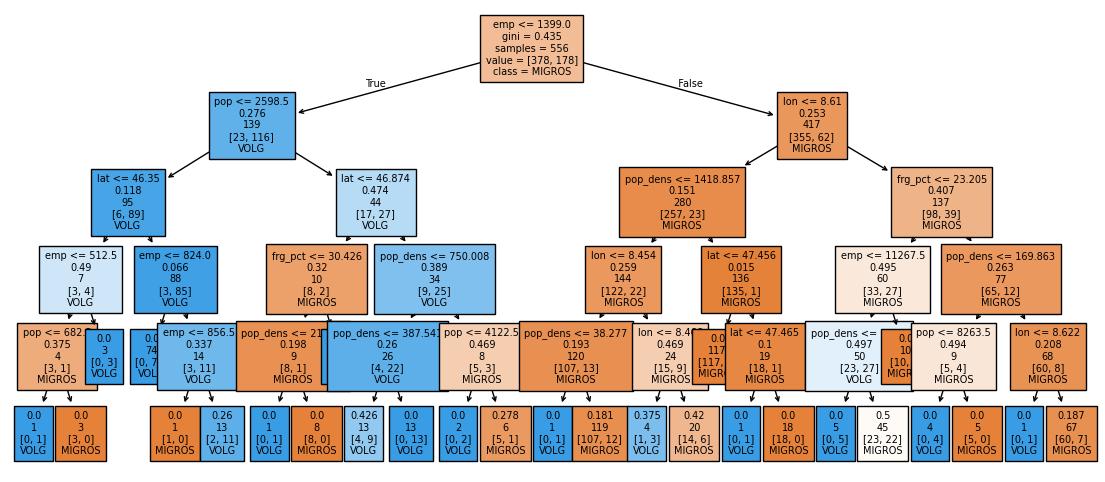

In [10]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['MIGROS', 'VOLG'],
                   filled=True,
                   fontsize=7,
                   label='root')

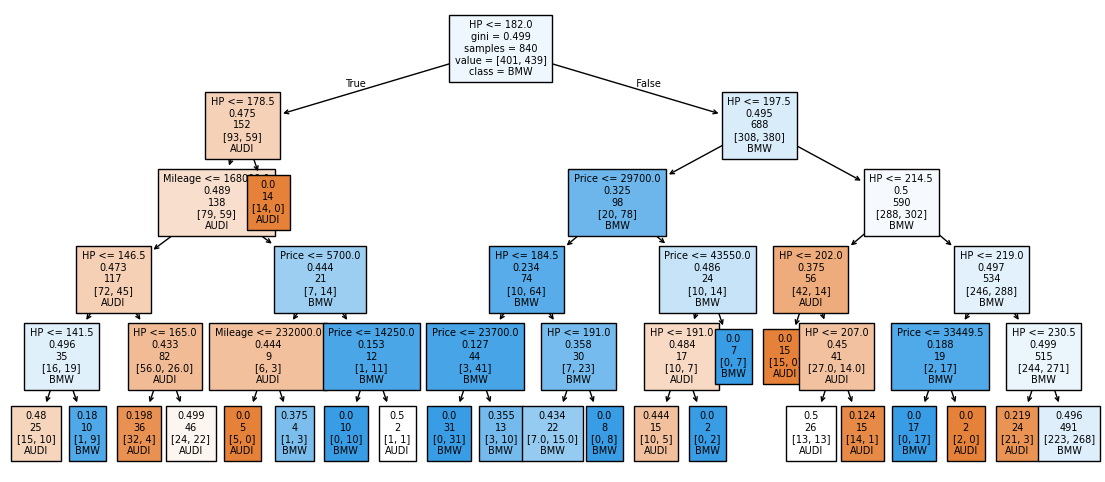

In [18]:
# For the meaning of numbers in boxes see root node
fig_car = plt.figure(figsize=(14,6))
tree_plot_car = tree.plot_tree(clf_car, 
                   feature_names=list(X_train_car.columns),  
                   class_names=['AUDI', 'BMW'],
                   filled=True,
                   fontsize=7,
                   label='root')

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [24]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['lat',
                                                                'lon',
                                                                'pop', 
                                                                'pop_dens', 
                                                                'frg_pct', 
                                                                'emp']],
                                                        df_sub['brand'], 
                                                        test_size=0.20, 
                                                        random_state=5)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
            lat       lon    pop     pop_dens    frg_pct     emp
2814  47.388170  8.253929   2445   315.483871  14.683027   858.0
2425  46.259128  7.902847   1337    25.895797   4.936425   539.0
2473  47.169307  7.524045   2844   634.821429   8.368495  1037.0
2705  46.527225  6.602452  12413  5642.272727  41.843229  6748.0
2839  47.450087  9.650465   5960   867.540029  49.580537  3158.0 

y2_train:
2814      VOLG
2425      VOLG
2473      VOLG
2705    MIGROS
2839    MIGROS
Name: brand, dtype: object


In [19]:
# Create train and test samples
X2_train_car, X2_test_car, y2_train_car, y2_test_car = train_test_split(df_sub_car[['Mileage',
                                                                'HP',
                                                                'Price']],
                                                        df_sub_car['Make'], 
                                                        test_size=0.20, 
                                                        random_state=5)

# Show X2_train
print('X2_train_car:')
print(X2_train_car.head(), '\n')

# Show y2_train
print('y2_train_car:')
print(y2_train_car.head())

X2_train_car:
      Mileage   HP  Price
460    250000  313  20500
2149    99900  450  35900
2115   162628  170   7100
3916    24000  258  58000
185     98000  313  27000 

y2_train_car:
460     AUDI
2149    AUDI
2115    AUDI
3916     BMW
185      BMW
Name: Make, dtype: object


### Fit the Random Forest Classifier

In [25]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)

# Train the classification tree model
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable
y_pred_rf = rfc.predict(X2_test)

# Crosstab
print('Brand versus predicted brand:', '\n')
df_pred = pd.DataFrame(data={'brand': y2_test, 
                             'brand_predicted': y_pred_rf}).reset_index(drop=True)
df_pred

Brand versus predicted brand: 



,brand,brand_predicted
0,MIGROS,MIGROS
1,MIGROS,MIGROS
2,MIGROS,MIGROS
3,VOLG,MIGROS
4,MIGROS,MIGROS
...,...,...
135,MIGROS,MIGROS
136,MIGROS,MIGROS
137,MIGROS,MIGROS
138,VOLG,MIGROS


In [20]:
# Initialize the random forest classifier
rfc_car = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)

# Train the classification tree model
rfc_car = rfc_car.fit(X2_train_car, y2_train_car)

# Predict the target variable
y_pred_rf_car = rfc_car.predict(X2_test_car)

# Crosstab
print('Brand versus predicted Make:', '\n')
df_pred_car = pd.DataFrame(data={'Make': y2_test_car, 
                             'Make_predicted': y_pred_rf_car}).reset_index(drop=True)
df_pred_car

Brand versus predicted Make: 



,Make,Make_predicted
0,BMW,BMW
1,AUDI,BMW
2,AUDI,BMW
3,AUDI,AUDI
4,AUDI,BMW
...,...,...
206,BMW,BMW
207,BMW,BMW
208,BMW,BMW
209,AUDI,AUDI


### Show confusion matrix and classification report

In [26]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[98  6]
 [ 8 28]] 

Classification report
              precision    recall  f1-score   support

      MIGROS       0.92      0.94      0.93       104
        VOLG       0.82      0.78      0.80        36

    accuracy                           0.90       140
   macro avg       0.87      0.86      0.87       140
weighted avg       0.90      0.90      0.90       140



In [27]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test_car, y_pred_rf_car), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test_car, y_pred_rf_car))

Confusion matrix
[[36 64]
 [17 94]] 

Classification report
              precision    recall  f1-score   support

        AUDI       0.68      0.36      0.47       100
         BMW       0.59      0.85      0.70       111

    accuracy                           0.62       211
   macro avg       0.64      0.60      0.58       211
weighted avg       0.63      0.62      0.59       211



### Show feature importance

Index(['emp', 'pop', 'frg_pct', 'pop_dens', 'lon', 'lat'], dtype='object')
[0.29380007 0.27210589 0.15087431 0.13026407 0.08730287 0.06565278]


<Axes: ylabel='features'>

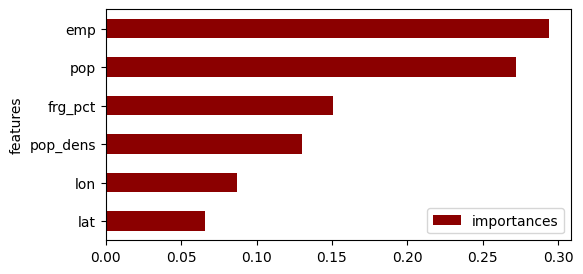

In [14]:
cols = X2_train.columns

# Derive feature importance from the random forest classifier
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

Index(['HP', 'Price', 'Mileage'], dtype='object')
[0.41330842 0.29754734 0.28914424]


<Axes: ylabel='features'>

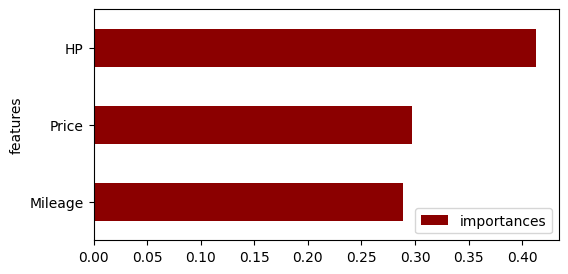

In [28]:
cols_car = X2_train_car.columns

# Derive feature importance from the random forest classifier
importances_car = rfc_car.feature_importances_
std_car = np.std([tree.feature_importances_ for tree in rfc_car.estimators_], axis=0)
indices_car = np.argsort(importances_car)[::-1]

# Print col-names and importances-values
print( cols_car[indices_car] )
print( importances_car[indices_car] )

# Barplot with feature importance
df_fi_car = pd.DataFrame({'features':cols_car,'importances': importances_car})
df_fi_car.sort_values('importances', inplace=True)
df_fi_car.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### ROC curve and AUC

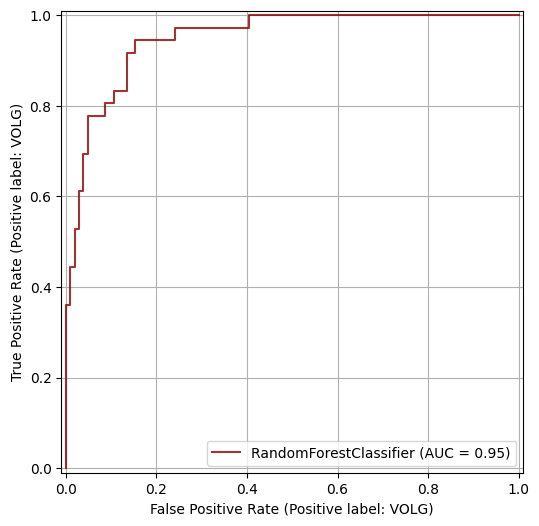

In [15]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,6))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.grid()
plt.show()

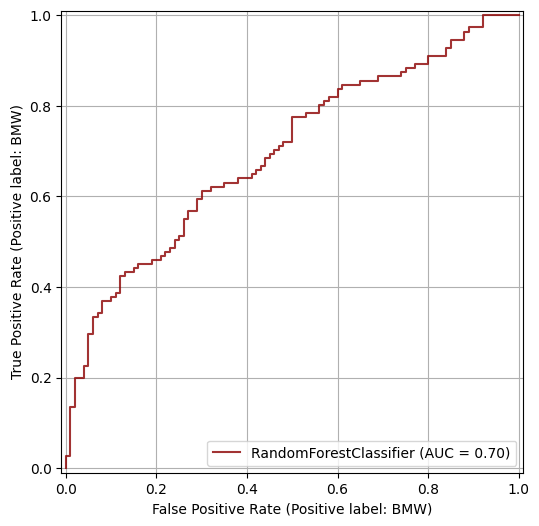

In [29]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,6))
ax = plt.gca()
rfc_disp_car = RocCurveDisplay.from_estimator(rfc_car, 
                                          X2_test_car, 
                                          y2_test_car, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.grid()
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [16]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-04 14:10:56
Python Version: 3.11.10
-----------------------------------
